In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas import set_option

spotify = pd.read_csv('/content/data.csv')
spotify = pd.DataFrame(spotify)
print("First five rows")
print(spotify.head())

print("Shape")
print(spotify.shape)
#spotify.dtypes
#Descriptive Statistics
set_option('display.width',100) #output width
set_option('precision',3) #decimal places
description = spotify.describe()
print(description)


First five rows
   acousticness                    artists  ...  valence  year
0     9.910e-01            ['Mamie Smith']  ...    0.634  1920
1     6.430e-01  ["Screamin' Jay Hawkins"]  ...    0.950  1920
2     9.930e-01            ['Mamie Smith']  ...    0.689  1920
3     1.730e-04        ['Oscar Velazquez']  ...    0.042  1920
4     2.950e-01                   ['Mixe']  ...    0.299  1920

[5 rows x 19 columns]
Shape
(174389, 19)
       acousticness  danceability  ...     valence        year
count    174389.000    174389.000  ...  174389.000  174389.000
mean          0.499         0.537  ...       0.525    1977.062
std           0.380         0.176  ...       0.264      26.908
min           0.000         0.000  ...       0.000    1920.000
25%           0.088         0.414  ...       0.311    1955.000
50%           0.517         0.548  ...       0.536    1977.000
75%           0.895         0.669  ...       0.743    1999.000
max           0.996         0.988  ...       1.000    2021.0

In [ ]:
# missing values
spotify.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [ ]:
# Cleaning

# removing waste stuff(square bracket and quotation marks) from artist's name 
spotify['artists'] = spotify['artists'].apply(lambda x: x[1:-1].replace("'", ''))
# correcting data types 
spotify['release_date'] = pd.to_datetime(spotify['release_date'])
spotify['year'] = pd.to_datetime(spotify['year'].apply(lambda x: str(x)+'-01-01'))

#changing duration ms to seconds
spotify['duration_ms'] = spotify['duration_ms']/1000
spotify.rename({'duration_ms':'duration_s'}, axis=1, inplace=True)

In [ ]:
# check duplicates
print(spotify['id'].is_unique)

dups = spotify.duplicated()
extract = spotify[dups]
print(extract['id'])

spotify.drop_duplicates(inplace=True)
print(spotify.shape)


dups2 = spotify.duplicated(subset=['acousticness','artists','danceability','duration_s','energy','explicit','instrumentalness','key','liveness','loudness','mode','name','speechiness','tempo','valence'])
extract2 = spotify[dups2]
print(extract2['id'])

True
Series([], Name: id, dtype: object)
(172230, 19)
86        2XVujD5mP2bMSXLkpqeWKU
88        2ZZ4rkQvNDkQt86sdwd398
126       3kjaYn5CnAM2v00hkJY7Wb
129       3vTys7kWK733lvNmrcbIiP
143       4HsM025MRTDfhvpPPOSqaN
                   ...          
174379    45XnLMuqf3vRfskEAMUeCH
174381    4pPFI9jsguIh3wC7Otoyy8
174383    52YtxLVUyvtiGPxwwxayHZ
174385    7tue2Wemjd0FZzRtDrQFZd
174387    1gcyHQpBQ1lfXGdhZmWrHP
Name: id, Length: 4125, dtype: object


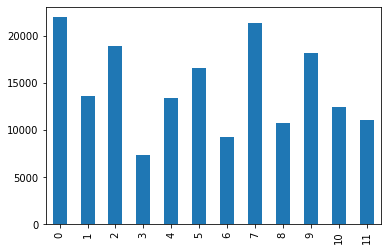

In [ ]:
#spotify['key'].hist(bins = 12, histtype='bar', rwidth=0.8)
spotify['key'].value_counts().sort_index().plot(kind = 'bar')
plt.show()

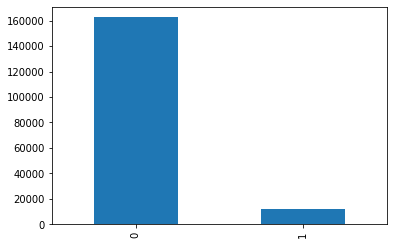

In [ ]:
spotify['explicit'].value_counts().plot(kind = 'bar')

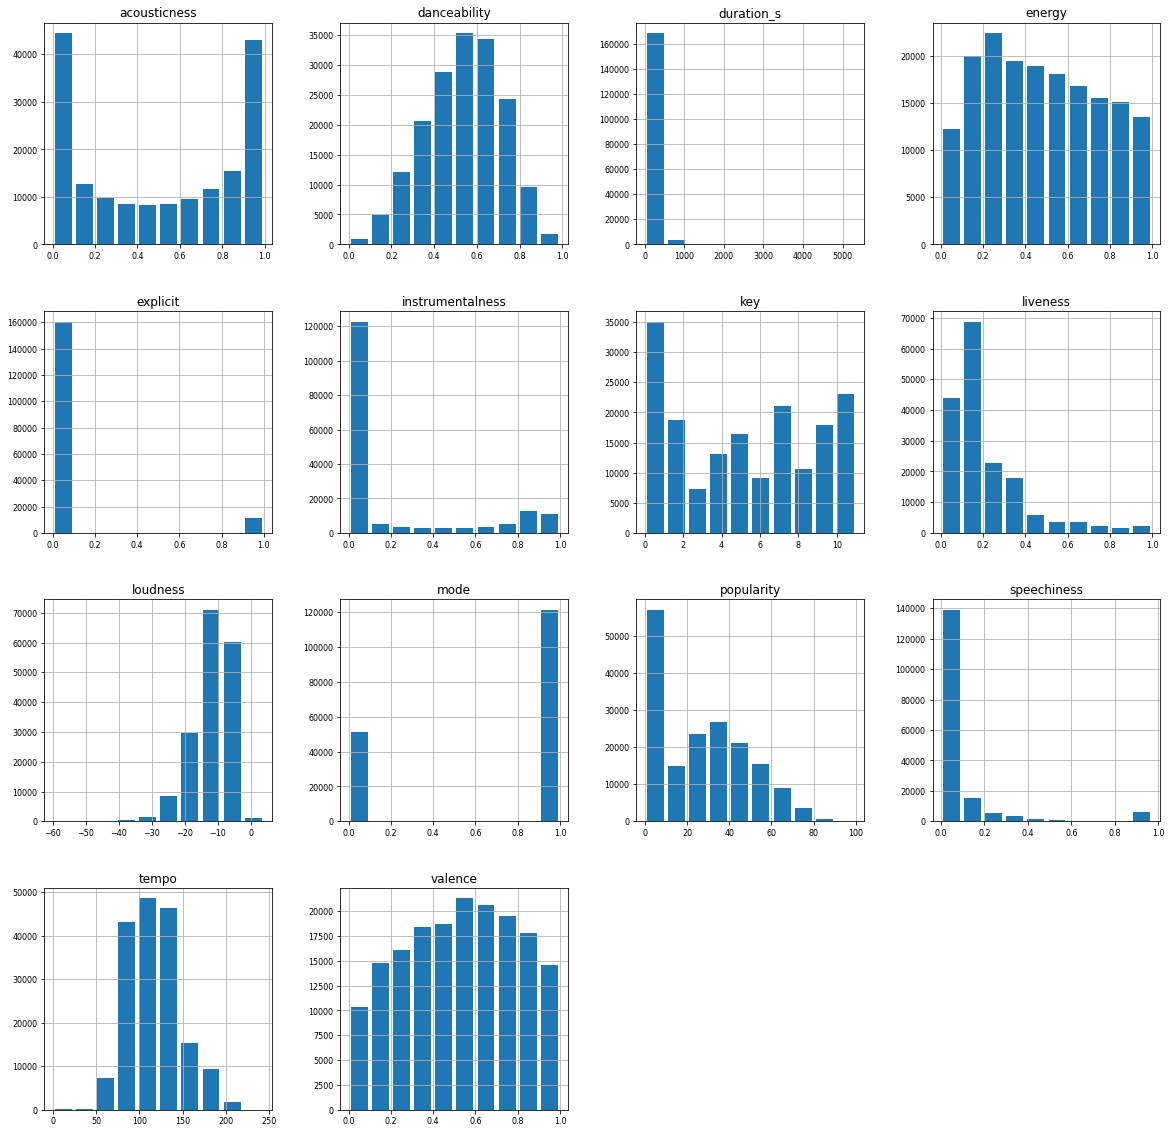

In [ ]:
# histograms
spotify.hist(figsize=(20, 20), xlabelsize=8, ylabelsize=8, rwidth=0.8)
plt.show()

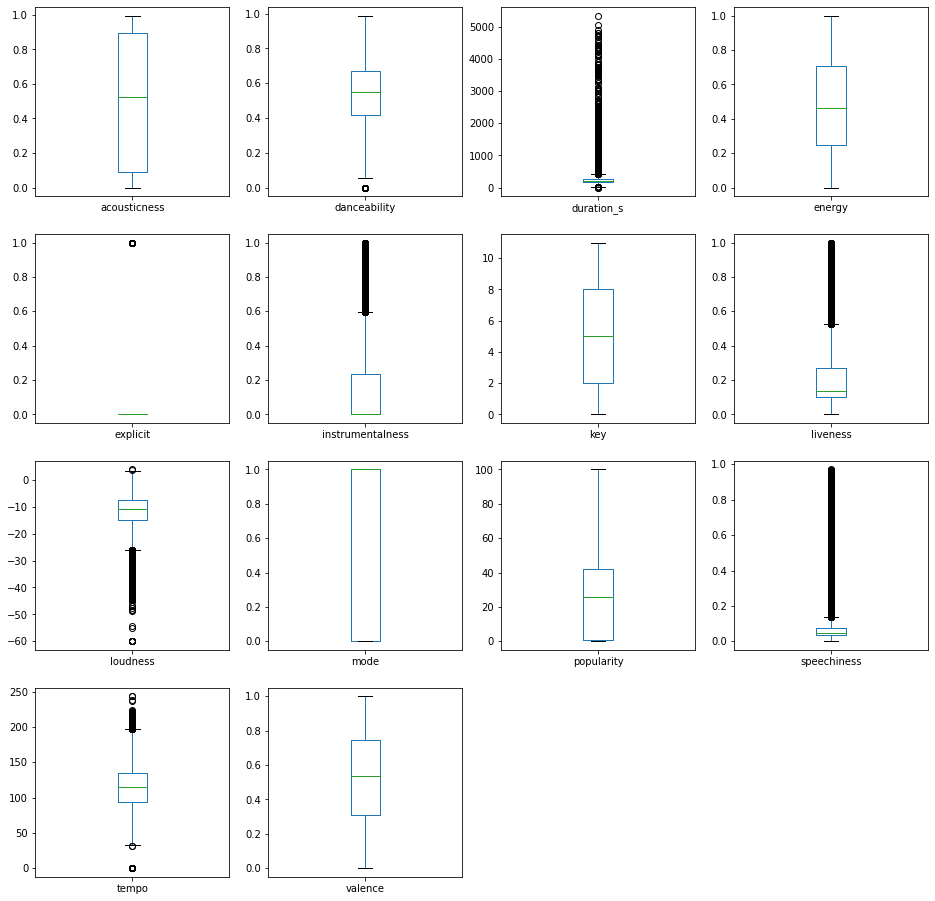

In [ ]:
# box plots
spotify.plot(kind='box', subplots=True, figsize=(16, 16), layout=(4,4), sharex=False, sharey=False)
#spotify.boxplot(subplots=True, figsize=(16, 16))
plt.show()

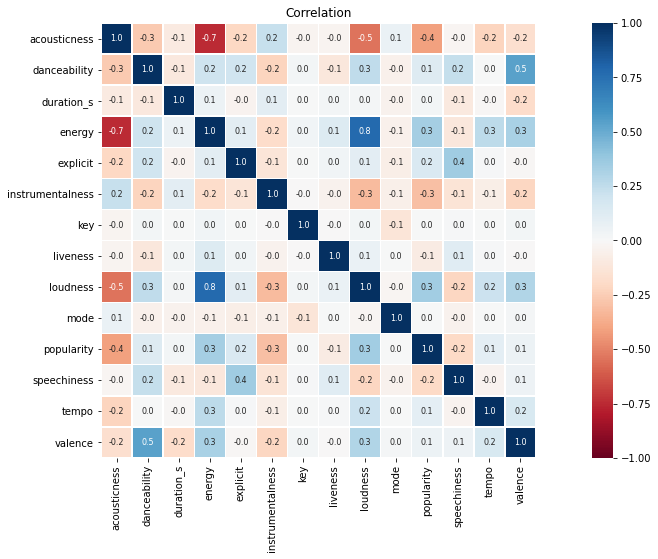

<Figure size 432x288 with 0 Axes>

In [ ]:
# finding correlation
corr = spotify.corr()
# visualizing correlaiton with heatmap
plt.figure(figsize=(20,8))
sns.heatmap(corr, vmax=1, vmin=-1, center=0,linewidth=.5,square=True, annot = True, annot_kws = {'size':8},fmt='.1f', cmap='RdBu')
plt.title('Correlation')
plt.show()
plt.savefig("corr.png")

In [ ]:
# Filter to 2020/2021
spotify_recent = spotify[(spotify['year'] == 2020) | (spotify['year'] == 2021)]
print(spotify_recent.shape)
#spotify_recent.head()

In [ ]:
# Correlation between features

import seaborn as sns
corr = spotify_recent.corr()
pop_corr = pd.DataFrame(corr.loc[:,'popularity'])

fig1, ax1 =  plt.subplots(figsize=(2,5))
ax1 = sns.heatmap(pop_corr, vmax=1, vmin=-1, center=0,linewidth=.5, annot = True, annot_kws = {'size':8},fmt='.1f', cmap='RdBu')
plt.title('Correlation against Popularity')
plt.show()

In [ ]:
# Draw Scatter plots between features and Popularity
col_list = ["acousticness","danceability","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence"]
fig, ax = plt.subplots(ncols=3, nrows=3, constrained_layout=True, figsize=(10, 10))

list_num = 0
for i in range(0,3):
  for j in range(0,3):
    variable = col_list[list_num]
    sns.scatterplot(x=variable, y='popularity', data=spotify_recent, ax=ax[i,j])
    # ax[i,j].scatter(spotify_recent[variable],spotify_recent['popularity']) # normal format
    ax[i,j].set_xlabel(variable)
    ax[i,j].set_ylabel("popularity")
    list_num += 1

plt.show()

In [ ]:
# 3D plot of chosen features against Popularity
from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure(1, figsize=(8, 6))
ax2 = Axes3D(fig2, elev=-150, azim=110)
ax2.set_title("3D plot of features with popularity as colour")
ax2.set_xlabel("Danceability")
ax2.w_xaxis.set_ticklabels([])
ax2.set_ylabel("Instrumentalness")
ax2.w_yaxis.set_ticklabels([])
ax2.set_zlabel("Loudness")
ax2.w_zaxis.set_ticklabels([])
leg_col = ax2.scatter(spotify_recent['danceability'],spotify_recent['instrumentalness'],spotify_recent['loudness'], c = spotify_recent['popularity'], cmap=plt.cm.cool, edgecolor='k', s=40)
cbar = plt.colorbar(leg_col)
cbar.set_label("Popularity")
plt.show()

In [ ]:
# Select features and standardise
from sklearn.preprocessing import StandardScaler

spotify_new = spotify_recent[['danceability', 'instrumentalness','loudness']]
spotify_pop = spotify_recent[['popularity']]

spotify_standard = pd.DataFrame(StandardScaler().fit_transform(spotify_new))

In [ ]:
# Perform PCA

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
spotify_pca = pca.fit_transform(spotify_standard)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.set_title("PCA decomposition of danceability, energy and tempo")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
scatter = ax.scatter(spotify_pca[:, 0], spotify_pca[:, 1], spotify_pca[:, 2], c=spotify_pop, cmap=plt.cm.cool, edgecolor='k', s=40)
cbar=plt.colorbar(scatter)
cbar.set_label("Popularity")
plt.show()

print(pca.components_)

In [ ]:
# Explained Variance Plot

explained_variance = pca.explained_variance_ratio_ 
plt.plot(explained_variance.cumsum(), linestyle = '--', marker = 'o')
plt.xlabel('Principal Component')
plt.xticks(np.arange(0,3,step=1),['PC 1','PC 2', 'PC 3'])
plt.ylabel('Cumulative Explained Variance')
plt.title("Cumulative Explained Variance")
plt.show()

print(explained_variance.cumsum())